![Py4Eng](../logo.png)

# Inference and transfer learning with pre-trained models
## Yoav Ram

In this session we will pre-trained models to classify images.
In this case, the models were pre-trained by other researchers.
We start with TensorFlow and then show an example with Keras.



# Inference with pre-trained models

Using pre-trained models is easy with Keras.

Let's load the [ResNet50 model](https://keras.io/applications/#resnet50) directly from the `keras.applications` module, together with some processing utilities. This follows code from [Keras docs](https://keras.io/applications/).

[ResNet50](https://github.com/KaimingHe/deep-residual-networks) was developed by Microsoft and was also trained on ImageNet data.
It uses [residual learning](https://arxiv.org/abs/1512.03385) to train very deep networks, up to 152 layers.
A nice summmary on residual learning is available [here](https://blog.waya.ai/deep-residual-learning-9610bb62c355).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import jax.numpy as np

import jax
import keras
print('Keras:', keras.__version__, 'backend:', keras.backend.backend(), jax.default_backend())

Keras: 3.6.0 backend: jax cpu


First, load the model (including downloading it, which may take some time).

In [2]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

Now, let's view the ResNet50 architecture.

In [3]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

That's really nice.

Load an image, convert it to array, and preprocess it for ResNet50.

In [5]:
img_path = '../data/Kobe_Bryant_2014.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

Now use the model to predict and then decode the predictions into a list of tuples (class, description, probability), one such list for each sample in the batch.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
basketball (prob = 0.9996)
bathing_cap (prob = 5.825e-05)
volleyball (prob = 4.811e-05)


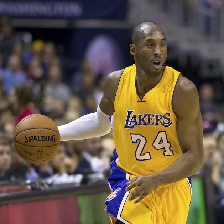

In [6]:
yhat = model.predict(x)
prediction = keras.applications.resnet50.decode_predictions(yhat, top=3)[0]
for id_, label, prob in prediction:
    print('{} (prob = {:.4g})'.format(label, prob))
img

# Transfer learning

In *transfer learning* we transfer knowledge gained on one problem to solve another problem.

In this case, we'll use the model we trained on MNIST digits to solve the MNIST-fashion: This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST (see [keras docs](https://keras.io/datasets/) for details). The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

We load the fashion-MNIST data.

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


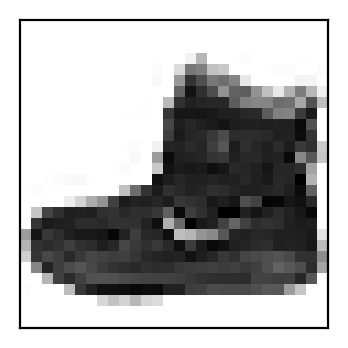

In [9]:
i = 0
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Let's load the model we trained on MNIST data in the [CNN session](K_CNN.ipynb).

In [10]:
model = keras.models.load_model('../data/keras_cnn_model.keras') 

Now, we re-train the model on the new data.

In [11]:
history = model.fit(
    x_train, y_train,
    batch_size=50,
    epochs=5,
    validation_data=(x_test, y_test)
).history

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 109s 90ms/step - accuracy: 0.7720 - loss: 0.6698 - val_accuracy: 0.8678 - val_loss: 0.3584
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 100s 82ms/step - accuracy: 0.8840 - loss: 0.3184 - val_accuracy: 0.8824 - val_loss: 0.3143
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 99s 82ms/step - accuracy: 0.8933 - loss: 0.2787 - val_accuracy: 0.8873 - val_loss: 0.3106
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 97s 81ms/step - accuracy: 0.9076 - loss: 0.2465 - val_accuracy: 0.8933 - val_loss: 0.3004
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 94s 78ms/step - accuracy: 0.9165 - loss: 0.2219 - val_accuracy: 0.8961 - val_loss: 0.2903


In [12]:
model.save('../data/keras_cnn_fashion_pretrain_model.keras')

In [13]:
model = keras.models.load_model('../data/keras_cnn_fashion_pretrain_model.keras')

In [14]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.2903458774089813
Test accuracy: 0.8960999846458435


When starting from fresh (i.e. random weights, see [solution](solutions/CNN.ipynb)), I got to validation accuracy 0.7815 after one epoch and to 0.8776 after 10 epochs.
So this approach is certainly faster, if you already have another network to start with.

# Refernces

- [Transfer learning and fine-tuning](https://keras.io/guides/transfer_learning/#freezing-layers-understanding-the-trainable-attribute) on Keras website.
- [Transfer learning example](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html): use ResNet50 to quickly train a classifeir on a small Dogs vs. Cats dataset.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)